# Problem Set 2, due April 27th at 3:30 pm

**Please Note:** This assignment will likely take you a _long_ time, especially if you are new to Python. Start early!

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on Canvas). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from Canvas. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|---------|---------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 'pobre'|
|progresa |treatment = 'basal'|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	  |gender of head of household (male=1)|
|hohage   |age of head of household|
|age      |years old|
|folnum	  |individual id|
|village  |	village id|
|sc97	  |schooling in 1997|

In [2]:
import sys; print(sys.version)

import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from pylab import *
from scipy import *
from pylab import rcParams
import statsmodels.formula.api as smf

%matplotlib inline

3.6.0 |Anaconda 4.3.1 (x86_64)| (default, Dec 23 2016, 13:19:00) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


---
##Part 1: Descriptive analysis

### 1.1	Summary Statistics

a) Present number of missing observations for every single variable


In [4]:
df_raw = pd.read_csv('progresa_sample.csv')
df_raw.isnull().sum()

year                0
sex                24
indig             300
dist_sec            0
sc               8453
grc              6549
fam_n               0
min_dist            0
dist_cap            0
poor                0
progresa            0
hohedu              0
hohwag              0
welfare_index     210
hohsex             20
hohage             10
age                 0
village             0
folnum              0
grc97               0
sc97             3872
dtype: int64

b) Present summary statistics (mean and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

In [3]:
df_raw_1 = df_raw.drop(['year', 'folnum', 'village'], axis = 1)
df_raw_1.describe()['mean':'std'].T.sort_index()

,mean,std
age,11.366460,3.167744
dist_cap,147.674452,76.063134
dist_sec,2.418910,2.234109
fam_n,7.215715,2.352900
grc,3.963537,2.499063
grc97,3.705372,2.572387
hohage,44.436717,11.620372
hohedu,2.768104,2.656106
hohsex,0.925185,0.263095
hohwag,586.985312,788.133664


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages? Hint: Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 for individuals who are poor (i.e., poor=='pobre').

Present your results in a single table with the following columns and 14 (or so) rows:

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male  |?     |?     |?     |?     |


In [4]:
from scipy.stats import ttest_ind

# create a dictionary for the data frame
dic = {'Variable name':[], 'Average value (Treatment villages)':[], 'Average value (Control villages)':[], 'Difference (Treat - Control)':[], 'p-value':[]}

# clean raw dataset
df_new = df_raw[(df_raw['year'] == 97)&(df_raw['poor'] == 'pobre')]
df_new = df_new.drop(['year', 'folnum', 'village', 'poor'], axis = 1)

# create two separate datasets: treatment and control
df_control = df_new[df_new['progresa'] == '0'].drop(['progresa'], axis = 1)
df_treatment = df_new[df_new['progresa'] == 'basal'].drop(['progresa'], axis = 1)
dic['Variable name'] = []
dic['Average value (Control villages)'] = []

# add data to each variable
for column in df_control:
    dic['Variable name'].append(column)
    dic['Average value (Control villages)'].append(round(df_control[column].dropna().mean(), 5))

for column in df_treatment:
    dic['Average value (Treatment villages)'].append(round(df_treatment[column].dropna().mean(), 5))

for i in range(len(dic['Variable name'])):
    dic['Difference (Treat - Control)'].append(round((dic['Average value (Treatment villages)'][i] - dic['Average value (Control villages)'][i]), 5))
    dic['p-value'].append(ttest_ind(df_treatment[dic['Variable name'][i]].dropna(), df_control[dic['Variable name'][i]].dropna())[1])

# convert dictionary to dataframe
df_res = pd.DataFrame(dic, columns=['Variable name', 'Average value (Treatment villages)', 'Average value (Control villages)', 'Difference (Treat - Control)', 'p-value'])

# print dataframe
df_res

,Variable name,Average value (Treatment villages),Average value (Control villages),Difference (Treat - Control),p-value
0,sex,0.51932,0.50505,0.01427,1.219172e-02
1,indig,0.32599,0.33221,-0.00622,2.453603e-01
2,dist_sec,2.45312,2.50766,-0.05454,3.569843e-02
3,sc,0.82270,0.81519,0.00751,9.517806e-02
4,grc,3.53160,3.54305,-0.01145,6.890151e-01
5,fam_n,7.28133,7.30247,-0.02114,4.271039e-01
6,min_dist,107.15291,103.23785,3.91506,2.358312e-16
7,dist_cap,150.82907,153.76973,-2.94066,8.415005e-04
8,hohedu,2.66314,2.59035,0.07279,1.105093e-02
9,hohwag,544.33954,573.16356,-28.82402,3.253835e-04


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

_**A:** Yes, there are statistically significant differences between treatment and control villages. For nearest distance to a secondary school, min distance to an urban center, min distance to the capital, years of schooling of head of household, monthly wages of head of household, welfare index used to classify poor and age of head of household, the p-values are below 0.05, indicating a statistically significant difference between treatment and control villages as baseline._

_**B:** Because if we want to do randomization in exploring the causal relationships between people and treatment, in this case if the two groups existed a difference at baseline, the differences shown after the treatment may not be valid, because we can not prove that the changes happend to the subjects are caused by the treatment directly._

_**C:** In this study, we want to measure the impact of the treatment by calculating the differences between two groups. So we may want to use other methods such as to remove the existing differences at baseline for those variable which were significant so as to measure the impact of treatment without bias._

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average enrollment rate in 1997. Create a scatterplot that shows this relationship. What do you notice?

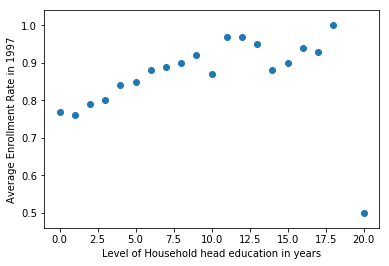

    Average Enrollment Rate  Household Head Education Level
0                      0.77                               0
1                      0.76                               1
2                      0.79                               2
3                      0.80                               3
4                      0.84                               4
5                      0.85                               5
6                      0.88                               6
7                      0.89                               7
8                      0.90                               8
9                      0.92                               9
10                     0.87                              10
11                     0.97                              11
12                     0.97                              12
13                     0.95                              13
14                     0.88                              14
15                     0.90             

In [5]:
import matplotlib.pylab as plt

# clean the raw dataset
df_edu = df_raw[df_raw['year'] == 97]

# see distinct education levels in total
df_edu['hohedu'].drop_duplicates()

# create dictionary
dic_edu = {'Household Head Education Level':[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20], 'Average Enrollment Rate':[]}
dic_edu['Average Enrollment Rate'] = []

# compute column
for i in dic_edu['Household Head Education Level']:
    df_this = df_edu[df_edu['hohedu'] == i]
    enroll = len(df_this[df_this['sc97'] == 1].dropna())
    total = len(df_this['sc97'].dropna())
    dic_edu['Average Enrollment Rate'].append(round((enroll / total), 2))

# plot the data
df_scatter = pd.DataFrame(dic_edu)
plt.scatter(df_scatter['Household Head Education Level'], df_scatter['Average Enrollment Rate'])
plt.xlabel("Level of Household head education in years")
plt.ylabel("Average Enrollment Rate in 1997")
plt.show()

print(df_scatter)

_**Interpretation:** There exists a relationship between the average school enrollment rates and the level of household head education. The avg enrollment rates kept increasing from around 75% to 92% for household head education years between 1 and 9; At the 10 year, there is a slight drop to 87%, then the number stayed at around 95% and then slightly dropped again. At year 18 it reached peak value of 100%, but at year 20 it falled to only 50%._

### 1.5 Graphical exploration, part 2

Create a histogram of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households).
* Does there appear to be a difference? Is this difference statistically significant?
* Which D estimator in Schultz (2004) does this approach correspond to?

Average enrollment rate in 1997 is: 0.81
Average enrollment rate in 1998 is: 0.83
Ttest_indResult(statistic=-2.0157134865156379, pvalue=0.04424870036572115)


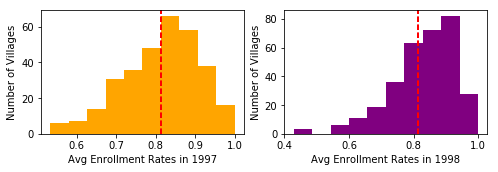

In [25]:
# aggregate by village for 1997 dataset and 1998 dataset, then calculate mean value for each column
df_97 = df_raw[(df_raw['year'] == 97) & (df_raw['poor'] == 'pobre') & (df_raw['progresa'] == 'basal')].groupby('village').mean()
df_98 = df_raw[(df_raw['year'] == 98) & (df_raw['poor'] == 'pobre') & (df_raw['progresa'] == 'basal')].groupby('village').mean()

# plot the histogram for the average enroll rates of two datasets
plot = plt.figure()
hist1 = plot.add_subplot(223)
hist1.hist(df_97['sc'], color = 'orange')
xlabel("Avg Enrollment Rates in 1997")
ylabel("Number of Villages")
# draw a vertical line that intersects the x-axis at the average value 
plt.axvline(df_97['sc'].mean(), color='red', linestyle='dashed', linewidth=2)

hist2 = plot.add_subplot(224)
hist2.hist(df_98['sc'], color = 'purple')
xlabel("Avg Enrollment Rates in 1998")
ylabel("Number of Villages")
#draw a vertical line that intersects the x-axis at the average value 
plt.axvline(df_97['sc'].mean(), color='red', linestyle='dashed', linewidth=2)

# print the mean values for two groups then run a t-test to explore relationship
print('Average enrollment rate in 1997 is:', round(df_97['sc'].mean(), 2))
print('Average enrollment rate in 1998 is:', round(df_98['sc'].mean(), 2))
t = stats.ttest_ind(df_97['sc'].dropna(), df_98['sc'].dropna())
print(t)

_**Interpretation:** From the above histograms we see that although the average enrollment rate did not change too much from 1997 to 1998 (it remained at about 80%), the mode value had moved higher from over 0.8 to over 0.9. Through the T test we can see that the difference is statistically significant, since the p-value is lower than 0.05._

_**Which D estimator in Schultz (2004) does this approach correspond to?** the estimator 1_

## Part 2: Measuring Impact

### 2.1 Simple differences: T-test

Start out by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment).
* calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages.
* Which difference estimator in Schultz (2004) does this approach correspond to?
* Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [34]:
# clean the data and create 2 datasets for treatment and control
treat_t = df_raw[(df_raw['poor'] == 'pobre')&(df_raw['year'] == 98)&(df_raw['progresa'] == 'basal')]
control_t = df_raw[(df_raw['poor'] == 'pobre')&(df_raw['year'] == 98)&(df_raw['progresa'] == '0')]

# print the average enrollment rate of two groups
print('The average enrollment rate in treatment villages is:', round(treat_t['sc'].mean(), 2))
print('The average enrollment rate in control villages is:', round(control_t['sc'].mean(), 2), '\n')

# run a t-test to determine the statistical significance of the differences
t = ttest_ind(control_t['sc'].dropna(), treat_t['sc'].dropna())
print(t)

The average enrollment rate in treatment villages is: 0.85
The average enrollment rate in control villages is: 0.81 

Ttest_indResult(statistic=-8.3587205674183735, pvalue=6.636344447523235e-17)


_**Interpretation:** The average enrollment rates in treatment villages and control villages are 0.85 and 0.81 respectively. From the t-test we observe a **statistically significant difference** between the two groups. Therefore, we can conclude that from 1998, the progresa program had a significant impact on the enrollment rates of children of **poor** households in the treatment villages._

_**Which D estimator in Schultz (2004) does this approach correspond to?** the estimator 2_

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. Discuss the following:

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [6]:
# clean the raw dataset and keep wanted rows
df_lm = df_raw[(df_raw['poor'] == 'pobre')&(df_raw['year'] == 98)]

# set the progresa values for treatment group to be 1, and those for control group to be 0
df_lm.loc[df_lm.progresa == 'basal', 'progresa'] = 1
df_lm.loc[df_lm.progresa == '0', 'progresa'] = 0

# run the regression and print the results
lm = smf.ols(formula = 'sc ~ progresa', data = df_lm).fit()
print(lm.params)
print(lm.summary())

/Users/Amit/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Intercept        0.807637
progresa[T.1]    0.038842
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Tue, 02 May 2017   Prob (F-statistic):           6.64e-17
Time:                        10:33:06   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------

_**Based on this model, how much did Progresa increase the likelihood of a child enrolling?** from the parameters of this regression model, we can interpretate that with no treatment, the average enrollment rate would be about 0.807; with one unit increase of treatment, we are likely to observe 0.038 unit of increase in the enrollment rate. Therefore, the Progresa increases the likelihood of a child enrolling by 0.038._

_**How does your regression estimate compare to your t-test estimate from part 2.1?** The estimates in t-test and regression are the same. In the t-test result, the average enrollment rate is 0.846 and 0.807 with and without treatment respectively. In the regression result, the equation can be 0.8076 + 1 x 0.3884 = 0.8464. So they have same estimate. _

_**Based on this regression model, can we reject the null hypothesis that the treatment effects are zero?** From the regression model we observe a p-value < 0.05. So at the significance level of 0.05 we can reject the null hypothesis that the treatment effect is zero._

_**What is the counterfactual assumption underlying this regression?** The counterfactual assumption is that in the absence of treatment, the average enrollment rates in the treatment villages and control villages are the same._

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [7]:
# run the multiple regression with other factors
multiple_lm = smf.ols(formula = 'sc ~ progresa + sex + indig + dist_sec + fam_n + min_dist + dist_cap + hohedu + hohwag + welfare_index + age + hohage', data = df_lm).fit()
print(multiple_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     849.5
Date:                Tue, 02 May 2017   Prob (F-statistic):               0.00
Time:                        10:33:13   Log-Likelihood:                -7541.1
No. Observations:               27263   AIC:                         1.511e+04
Df Residuals:                   27250   BIC:                         1.521e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         1.4431      0.018     80.855

_**How do the controls affect the point estimate of treatment effect?**_
_In the multiple regression model, we can examine the treatment effect through the co-efficient value of progresa[T.1], and it's 0.0337. In the above models, the treatment effect is 0.0388. So the control factors have reduced the treatment effect from 0.0388 to 0.0337, which is a slight drop._

_**How do the controls affect the standard error on the treatment effect?**_
_The control variables have reduced the standard error on the treatment effect from 0.005 to 0.004, indicating that the introduction of control variables have improved the accuracy of our regression model._

_**How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?**_
_Firstly, the estimate of intercept value is 1.4431 in 2.3 and 0.8076 in 2.2; More specifically, take the age variable for example, we can interpret that for 1 year increase of a child's age, we are likely to observe 0.0657 unit of decrease in the enrollment rate, assuming that other factors don't change. Take progresa factor for another example, with one unit increase of treatment, we can observe 0.0337 unit of increasing enrollment rate if other factors remain the same. Therefore we can see that the prpgresa treatment is still the most effective promoter of the children enrollment rate._

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages. The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [51]:
# create 2 datasets for two years respectively
diff_97 = df_raw[(df_raw['poor']=='pobre')&(df_raw['year']==97)]
diff_98 = df_raw[(df_raw['poor']=='pobre')&(df_raw['year']==98)]

# calculate the average enrollment rates for 2 datasets
treat_98 = diff_98['sc'][diff_98['progresa'] == 'basal'].mean()
treat_97 = diff_97['sc'][diff_97['progresa'] == 'basal'].mean()
control_98 = diff_98['sc'][diff_98['progresa'] == '0'].mean()
control_97 = diff_97['sc'][diff_97['progresa'] == '0'].mean()

# create a dataframe to store the mean values
rows = ['Enrollment Rate before Treatment', 'Enrollment Rate after Treatment']
cols = ['Treatment Group', 'Control Group']
df_diff = pd.DataFrame(index = rows, columns = cols)
df_diff.loc['Enrollment Rate before Treatment', 'Treatment Group'] = treat_97
df_diff.loc['Enrollment Rate after Treatment', 'Treatment Group'] = treat_98
df_diff.loc['Enrollment Rate before Treatment', 'Control Group'] = control_97
df_diff.loc['Enrollment Rate after Treatment', 'Control Group'] = control_98

# print the estimate of the treatment impact, and the dataframe
diff_diff = (treat_98 - treat_97) - (control_98 - control_97)
print('The estimate of treatment effect (diff-diff value) is:', round(diff_diff, 5))
df_diff

The estimate of treatment effect (diff-diff value) is: 0.03133


,Treatment Group,Control Group
Enrollment Rate before Treatment,0.822697,0.815186
Enrollment Rate after Treatment,0.846479,0.807637


_**What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?**
The diff-in-diff estimate value is **0.03133**, which is lower than the earlier results 0.0388 and 0.0337._

_**What is the counterfactual assumption underlying this estimate?**
The counterfactual assumption is that without the progresa treatment, the change happens in the treatment group would be the same as the control group._

### 2.5 Difference-in-Difference, version 1 (regression)

Now use a regression specification to estimate the average treatment effect of the program (on the poor) in a difference-in-differences framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* How do these estimates of the treatment effect compare to the estimates based on the simple difference?
* How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
* What is the counterfactual assumption underlying this regression? 

In [8]:
# select rows for the poor and convert 'poor' and 'progresa' variable to numeric, then create new column 'before or after treatment'
df_poor = df_raw[df_raw['poor'] == 'pobre']
df_poor.loc[df_poor.year == 97, 'after'] = 0
df_poor.loc[df_poor.year == 98, 'after'] = 1
df_poor.loc[df_poor.progresa == 'basal', 'progresa'] = 1
df_poor.loc[df_poor.progresa == '0', 'progresa'] = 0

# run the regression in a diff-in-diff framework with 5 control variables
diff_lm = smf.ols(formula = 'sc ~ progresa + progresa:after + after + sex + age + dist_sec + min_dist + hohedu + hohage', data = df_poor).fit()
print(diff_lm.summary())

/Users/Amit/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/Amit/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     2533.
Date:                Tue, 02 May 2017   Prob (F-statistic):               0.00
Time:                        10:34:01   Log-Likelihood:                -16644.
No. Observations:               58344   AIC:                         3.331e+04
Df Residuals:                   58334   BIC:                         3.340e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept               1.4242    

_**What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.**
For treatment group after 1998, the estimate of progresa treatment effect is 0.0314 with a standard error of 0.005. For all households after 1998, the average enrollment rate is increased by 0.0274 with a standard error of 0.004. The progresa co-efficient is below 0.05 and is not significant this time._

_**How do these estimates of the treatment effect compare to the estimates based on the simple difference?**
Take the time factor's interaction with progresa treatment and their impact on the average enrollment rate, the overall estimate of the treatment effect is 0.0314, very similar but slightly more than the estimates based on the simple difference._

_**How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?**
These estimates are similar or more than the diff-in-diff estimates from 2.4 above. The other control variables may caused these differences, in case that some subjects may exsit systematic differences which can cause different treatment effects._

_**What is the counterfactual assumption underlying this regression?**
The counterfactual assumption is that without the progresa treatment, the change happens in the treatment group would be the same as the control group._

### 2.6 Difference-in-Difference, version 2

In the previous problem, you estimated a difference-in-differences model that compared changes in enrollment rates over time across treatment and control villages. An alternative approach would be to compare enrollment rates in 1998 between poor and non-poor across treatment and control villages. 

* How would we estimate this version of the treatment effects in a regression model? 
* What is the counterfactual assumption underlying this regression?
* How do these treatment effects compare to the estimates above?
* Discuss some possible explanations for differences or similarities 

In [76]:
# filter the dataset for 1998 observations
diff_lm_98 = df_raw[df_raw['year'] == 98]

# convert wanted columns to numeric
diff_lm_98.loc[diff_lm_98.poor == 'pobre', 'poor'] = 1
diff_lm_98.loc[diff_lm_98.poor == 'no pobre', 'poor'] = 0
diff_lm_98.loc[diff_lm_98.progresa == 'basal', 'progresa'] = 1
diff_lm_98.loc[diff_lm_98.progresa == '0', 'progresa'] = 0

# run the regression
poor_lm = smf.ols(formula = 'sc ~ progresa + poor + progresa:poor + sex + age + dist_sec + min_dist + hohedu + hohage', data=diff_lm_98).fit()
print(poor_lm.summary())

/Users/Amit/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     1331.
Date:                Sun, 30 Apr 2017   Prob (F-statistic):               0.00
Time:                        20:08:27   Log-Likelihood:                -9278.9
No. Observations:               32093   AIC:                         1.858e+04
Df Residuals:                   32083   BIC:                         1.866e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                 

_**How would we estimate this version of the treatment effects in a regression model?**_
_* First, the coefficient of progresa is 0.0263 and is very significant, indicating that with one unit of treatment we would observe 0.0263 unit increase of enrollment rate._
_* Second, the coefficient of poor variable is -0.0142 but is not significant. This may indicate that poor households lower the enrollment rate, but since poor households are more supposed to accept treatment thus will have increasing enrollment rate, this outcome remains to be discussed._
_* Third, the joined estimate of progresa and poor is 0.0058 but is not significant._

_**What is the counterfactual assumption underlying this regression?**
The counterfactual assumption is that assume that there is no progresa treatment, the average enrollment rate of the poor households and non-poor households would be the same._

_**How do these treatment effects compare to the estimates above?**_
_The total treatment effect of progresa on poor households should be 0.0263+0.0142-0.0058 = 0.0347. But both the poor estimate and the interaction estimate are not significant, so the treatment effects are similar or smaller compared to the estimates above._

_**Discuss some possible explanations for differences or similarities:**_
_One possible explanation of the negative estimate of the poor households' enrollment rates as well as why those estimates are not statistically significant is that maybe there are more people of poor households that are supposed to join the progresa program, compared to the non-poor households. That is to say the progresa treatment actually should promote enrollment rates among poor households, instead of making it lower._


### 2.7 Spillover effects (extra credit)

Thus far, we have focused on the impact of PROGRESA on poor households. Repeat your analysis in 2.5, using a double-difference regression to estimate the impact of PROGRESA on non-poor households. In other words, compare the difference in enrollments between 1997 and 1998 for non-poor households in treatment villages with the difference in enrollments between 1997 and 1998 for non-poor households in control villages.

* A: Describe one or two reasons why PROGRESA might have impacted non-poor households.
* B: Do you observe any impacts of PROGRESA on the non-poor?
* C: What is the identifying assumption that you are using to estimate the impact of PROGRESA on non-poor households.

In [77]:
# filter rows with same method
df_non_poor = df_raw[df_raw['poor'] == 'no pobre']
df_non_poor.loc[df_non_poor.year == 97, 'after'] = 0
df_non_poor.loc[df_non_poor.year == 98, 'after'] = 1
df_non_poor.loc[df_non_poor.progresa == 'basal', 'progresa'] = 1
df_non_poor.loc[df_non_poor.progresa == '0', 'progresa'] = 0

# run the regression
non_poor_lm = smf.ols(formula = 'sc ~ progresa + after + progresa:after + sex + age + dist_sec + min_dist + hohedu + hohage', data=df_non_poor).fit()
print(non_poor_lm.summary())

/Users/Amit/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/Amit/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     465.0
Date:                Sun, 30 Apr 2017   Prob (F-statistic):               0.00
Time:                        20:29:43   Log-Likelihood:                -3697.0
No. Observations:               10423   AIC:                             7414.
Df Residuals:                   10413   BIC:                             7486.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept               1.4756    

_**A: Describe one or two reasons why PROGRESA might have impacted non-poor households.**
I think the possible reason is that Progresa might have a spillover effect that children want to follow the trend of enroll to school when they see each other enrolling for school. Maybe progresa had created such environment thus caused non-poor households having higher enrollment rates._

_**B: Do you observe any impacts of PROGRESA on the non-poor?**
Yes. The effect estimate of progresa to non-poor households who did not received subsidy is 0.0382; the effect estimate of progresa to non-poor households who received subsidy is 0.0278+0.0382-0.0022 = 0.0638. Both of them indicate a promotion on enrollment rate._

_**C: What is the identifying assumption that you are using to estimate the impact of PROGRESA on non-poor households.**
The assumption is that without the Progresa treatment, the average enrollment rate of non-poor households would not increase._

### 2.8 Summary

Based on all the analysis you have undertaken to date, do you thik that Progresa had a causal impact on the enrollment rates of poor households in Mexico?

_From the simple difference analysis and the difference in difference analysis above, we can conclude that **Progresa had a causal impact on** the enrollment rates of the poor households in Mexico._

_First of all, we can observe a statistically significant impact of the Progresa treatment on enrollment rate from the T-test and simple linear regression. Then we take the differences at baseline into account such as the time effect, and from the diff-in-diff regression we can still observe a significant impact from Progresa to the enrollment rates of poor households. In this process, the calculated effect estimates also became more accurate, which supports our conclusion that there exist a causal impact._

_Furthermore, from the other regressions we performed, we can also conclude that Progresa had **improved the overall enrollment rate** both in the treatment group and the control group, in addition to the poor households._